# 00.01 basics: polynomials & floating-point

##### code, setup and dependencies

In [ ]:
if True: # settings for the people
  import matplotlib.pyplot as plt
  import numpy as np

In [ ]:
def img_fps():
  es = [-2,-1,0,1,2]
  ms = np.arange(1,2,0.125) # implicit 1 + 3 position binary fractional
  zeros = np.zeros_like(ms)

  # plot
  plt.close("all")
  plt.figure(figsize=(20,2))

  plt.plot([0,8],[0,0],color="0.5")
  for e in es:
    xs = ms*pow(2,e)  # + mantissa x base^e
    plt.scatter(xs,zeros,marker="|",s=500)
    s_e = "$2^{" + f"{e}" + "}$"
    plt.text(xs.min(),.015,s_e,size="xx-large")

  plt.axis("off")
  plt.show()

## 0 intro

<b>numerical methods</b>, as distinguished from other branches of mathematics and from computer science,

1. work with arbitrary real numbers (including rational <b>approximations</b> of irrational numbers) and
2. consider <b>cost</b> and
3. consider <b>accuracy</b>.$^{[1]}$

<i>this class will provide another way to express, to extend your math.</i>

numerical methods are the algorithms; <b>numerical analysis</b> is the study of their properties -- ie, accuracy, stability, convergence, efficiency, usw.

## 1 polynomials

<i>The most fundamental operations of arithmetic are <b>addition</b> and <b>multiplication</b>. These are also the operations needed to evaluate a polynomial $p(x)$ at a particular value $x$. It is no coincidence that polynomials are the basic building blocks for many computational techniques we will construct.$^{[2]}$</i>

### i) evaluation

##### example 01

consider $\enspace p(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0$.

with computational considerations:

1. <b>approximate</b> $p(x)$ at $x$ while
2. minimizing <b>operations</b> and
3. maximizing <b>accuracy</b>.

wrt operations.

- method 1, step individually:
  - $p(x) = a_4 \times x \times x \times x \times x + a_3 \times x \times x \times x + a_2 \times x \times x + a_1 \times x + a_0 \mapsto 14$ operations.

- method 2, cache and reuse:
  - $x_2 = x \times x, x_3 = x_2 \times x, x_4 = x_3 \times x \mapsto 3$ operations;
  - $p_4 = a_4 \times x_4, p_3 = a_3 \times x_3, p_2 = a_2 \times x_2, p_1 = a_1 \times x_1 \mapsto 4$ operations;
  - $p(x) = p_4 + p_3 + p_2 + p_1 + a_0 \mapsto 4$ operations $\mapsto 11$ operations total.

- method 3, nested multiplication ([horners method](https://en.wikipedia.org/wiki/Horner%27s_method)):
  - $p(x) = (((a_4 \times x + a_3) \times x + a_2) \times x + a_1) \times x + a_0 \mapsto 8$ operations.

## 2 binary notation

<b>binary notation:</b> $\quad \dots b_2b_1b_0.b_{-1}b_{-2} \dots$.

### i) conversion to decimal

$$
\Rightarrow \enspace \dots b_2 \times 2^2 + b_1 \times 2^1 + b_0 \times 2^0 + b_{-1} \times 2^{-1} + b_{-2} \times 2^{-2} \dots
$$

##### example 02

evaluate $111.11_2$.

\begin{align}
  \text{integer:} &\quad 1 \times 2^2 + 1 \times 2^1 + 1 \times 2^0 = 4 + 2 + 1 = 7 \\
  \\
  \text{fractional:} &\quad 1 \times 2^{-1} + 1 \times 2^{-2} = \tfrac{1}{2} + \tfrac{1}{4} = \tfrac{3}{4} \\
  \\
  &\quad\Downarrow \\
  \\
  111.11_2 &= 7_{10} + (\tfrac{3}{4})_{10} = 7.75_{10}.
\end{align}

### ii) conversion from decimal

##### example 03

evaluate $111.25_{10}$.

\begin{align}
  \text{integer:} &\qquad\; \tfrac{111}{2} = 55\, R\, 1 \\
  &\quad\rightarrow \tfrac{55}{2} = 27\, R\, 1 \\
  &\quad\rightarrow \tfrac{27}{2} = 13\, R\, 1 \\
  &\quad\rightarrow \tfrac{13}{2} = 6\, R\, 1 \\
  &\quad\rightarrow \;\tfrac{6}{2} = 3\, R\, 0 \\
  &\quad\rightarrow \;\tfrac{3}{2} = 1\, R\, 1 \\
  &\quad\rightarrow \;\tfrac{1}{2} = 0\, R\, 1 \\
  \\
  &\quad\rightarrow 1101111, \enspace\text{remainders in reverse order}  \\
  \\
  \text{fractional:} &\qquad\enspace 0.25\times 2 = 0.50 + 0 \\
  &\quad\rightarrow 0.50\times 2 = 0.00 + 1 \\
  \\
  &\quad\rightarrow 0.01, \enspace\text{integers in order from left to right} \\
  \\
  &\quad\Downarrow \\
  \\
  111.25_{10} &= 1101111_2 + 0.01_2 = 1101111.01_2.
\end{align}

## 3 polynomials in the machine

### i) digital representation

\begin{align}
  x &= [d_{N-1},\dots,d_1,d_0] \quad\text{digital vector} \\
  \\
  &= d_{N-1} \times b^{N-1} + \dots + d_1 \times b^1 + d_0\times b^0 \quad\text{with}\textbf{ precision } N \text{ and}\textbf{ base } b.
\end{align}

##### example 04

- base 10: $\quad 500_{10} = [5,0,0]; \quad [5] = 5_{10}$.
- base 02: $\quad [1,0,1] = 101_2 = 1\times 2^2 + 0\times 2^1 + 1\times 2^0 = 4 + 0 + 1 = 5_{10}$.

### ii) fixed/positional representation

##### example 04, continued

example 04, base 02, continued.

- base 02: $101_2 = 1\times 2^2 + 0\times 2^1 + 1\times 2^0$

where RHS is <b>fixed representation</b> and LH subscript is the base or <b>radix</b> r.

##### usw

additionally, precision $N\ge 1, r\ge 2$ such that

\begin{align}
  x = &\enspace \sum^N d_kr^k \text{ has } r^N \textbf{ permutations}
\end{align}

and can also be written as

$r^N = \color{blue}{(r-1)}({\bf r^{N-1}}) + \color{red}{(r^{N-1})} = \color{blue}{[r-1]_{N-1}}[r]_{N-2}\dots[r]_1[r]_0 + \color{red}{[r]_{-1}[r]_{-2}\dots [r]_{N-2}[r]_{N-1}}$

where subscripts denote position wrt exponent.

##### example 05

describe set where $N=3, r=2$.

\begin{align}
  \text{permutations:}&\quad r^N = 2^3 = 8 \\
  &\qquad\; = (r-1)\cdot r_1\cdot r_0 + r_{-1}\cdot r_{-2} = (2-1)\cdot 2\cdot 2 + 2\cdot 2 = 4 + 4 = 8 \enspace\checkmark \\
  \\
  &\qquad\; \Rightarrow \{000,001,010,011,100,101,110,111 \}; \\
  \\
  \text{magnitude:}&\quad \sum^{N-1} d_kr^k \le \sum^{N-1} (r-1)r^k = r^N - 1 \Rightarrow \enspace\text{range}^{[*]} \enspace [0,r^N - 1] = [0,7]_{10}.
\end{align}

[*] note: "range of magnitude" of $x$ is also "range" of $x$ bc representation of $x$ does not allow for sign.

### iii) sign

sign extends range.

- method 1: use position for $d_{N-1}$ for sign.

\begin{align}
  x = &\enspace \underset{d_{N-1}}{[\pm]}[d_{N-2},\dots,d_1,d_0] \quad\text{and} \\
  \\
  \text{permutations:} &\enspace r^{N-1}\times 2; \\
  \\
  \text{range:} &\enspace [-r^{N-1}+1,0],[0,+{\bf r^{N-1}-1}]^{[*]}.
\end{align}

[*] note: yes, thats $-0$ and $+0$. fun, right?

- method 2: use bias to obtain sign.

ie, all positions used for magnitude and <i>bias is an operation</i>.

\begin{align}
  \text{permutations}: &\enspace r^N \\
  \text{unbiased range}: &\enspace [x_{\text{min}},x_{\text{max}}] = [0,r^N-1] \\
  \text{biased range}: &\enspace [x_{\text{min}},x_{\text{max}}] - B = [-B, (r^N - 1) - B]
\end{align}

and <b>standard bias</b> ${\bf B = r^{N-1} - 1}$.

##### example 06

example 06 extends example 05 wrt standard bias.

\begin{align}
  B = &\enspace r^{N-1} - 1 = (2)^{(3-1)} - 1 = 4-1 = 3 \quad\text{and} \\
  \\
  \text{range:} &\enspace [000,111]_2 \enspace\mapsto\enspace [0,7]_{10} - B = [-3,+4]_{10}.
\end{align}

## 4 floating-point

$x = M.b^E$, where <b>mantissa</b> $M$ is an integer represented by sign, magnitude, radix and <b>precision</b> $m$; <b>exponent</b> $E$ is an integer represented by bias and same radix. also, $M$ is <b>normalized</b> as $1.F$, where "$1.$" is implicit and <b>fractional</b> $F$ is

$$F = \sum^{m-2} d_kr^k, r\ge 2 \Rightarrow x = \pm 1.F\times b^E.$$

ie, same $r$ for $M,E$; $m$ includes sign; $m_E = N-m$; $B=r^{N-1}-1$ with bias power $N-1 = m_E - 1$. note: $b$ is the base of the exponent and not the base of the exponents power.

$$x = \color{darkorange}{\pm}1.\color{green}{F}\times \color{purple}{2}^{\color{blue}{E}} = [\color{darkorange}{s}] \overbrace{\underbrace{\overbrace{[\color{blue}{\dots}][\color{blue}{e_1}][\color{blue}{e_0}]}^{m_E = N-m}}_{\color{blue}{...} + \color{blue}{e_1}\times \color{red}{r}^1 + \color{blue}{e_0}\times \color{red}{r}^0} 1. \underbrace{\overbrace{[\color{green}{f_1}][\color{green}{f_2}][\color{green}{\dots}]}^{m_F = m-sign}}_{\color{green}{f_1}\times \color{red}{r}^{-1} + \color{green}{f_2}\times \color{red}{r}^{-2} + \color{green}{\dots}}}^{\text{positions allocated}}.$$

##### example 07

given $\mathbb{FP}(N=5,m=3,r=\color{red}{3},b=\color{purple}{2})$ with standard bias$^{[3]}$, what is the value represented by $[\color{darkorange}{0},\color{blue}{1},\color{blue}{1},\color{green}{2},\color{green}{0}]_{\mathbb{FP}(5,3,3,2)}$?

$$x = \color{darkorange}{\pm}1.\color{green}{F}\times \color{purple}{2}^{\color{blue}{E}} = [\color{darkorange}{s}] \underbrace{\overbrace{[\color{blue}{e_1}][\color{blue}{e_0}]}^{m_E = 5-3=2} 1. \overbrace{[\color{green}{f_1}][\color{green}{f_2}]}^{m_F = 3-1=2}}_{\text{positions allocated}},$$

where

\begin{align}
  \color{darkorange}{s} &\in\{0,1\} \\
  \\
  \color{green}{f_j} &\in\{0,1,2\}_{\color{red}{3}} \\
  \\
  &\Rightarrow F_{\text{magnitude}} = [0.00,0.22]_{\color{red}{3}} \quad\text{and} \\
  \\
  \color{blue}{e_i} &\in\{0,1,2\}_{\color{red}{3}} \\
  \\
  B &= r^{N-1} - 1 \mapsto r^{m_E-1} - 1 = \color{red}{3}^{2-1} - 1 = (3-1)_{10} = 2_{10} \\
  \\
  &\Rightarrow E_{\text{range}} = [00,22]_{\color{red}{3}} - B = [0,8]_{10} - 2_{10} = [-2,6]_{10}.
\end{align}

answer.

\begin{align}
  x &= [\color{darkorange}{0},\color{blue}{1},\color{blue}{1},\color{green}{2},\color{green}{0}]_{\mathbb{FP}(5,3,3,2)} \\
  \\
  &= (-1)^{\color{darkorange}{0}}\times 1.\color{green}{20}_{\color{red}{3}}\times \color{purple}{2}^{\color{blue}{E}} \quad\text{where } \color{blue}{E} = (\color{blue}{11}_{\color{red}{3}} - B) = (4-2)_{10} = \color{blue}{2}_{10} \\
  \\
  &= +(1.+\color{green}{2}\times \color{red}{3}^{-1})_{10}\times \color{purple}{2}^{\color{blue}{2}} = + (\tfrac{5}{3})\times 4 = +\tfrac{20}{3} = +6.\overline{6}.
\end{align}

##### example 08

given $\mathbb{FP}(N=6,m=4,r=\color{red}{3},b=\color{purple}{2})$ with standard bias.$^{[4]}$, what are the minimum and maximum magnitudes possible?

$$x = \color{darkorange}{\pm}1.\color{green}{F}\times \color{purple}{2}^{\color{blue}{E}} = [\color{darkorange}{s}] \underbrace{\overbrace{[\color{blue}{e_1}][\color{blue}{e_0}]}^{m_E = 6-4=2} 1. \overbrace{[\color{green}{f_1}][\color{green}{f_2}][\color{green}{f_3}]}^{m_F = 4-1=3}}_{\text{positions allocated}},$$

where

\begin{align}
  \color{darkorange}{s} &\in\{0,1\}, \color{green}{f_j} \in\{0,1,2\}_{\color{red}{3}} \\
  \\
  &\Rightarrow F_{\text{magnitude}} = [0.000,0.222]_{\color{red}{3}} \quad\text{and} \\
  \\
  \color{blue}{e_i} &\in\{0,1,2\}_{\color{red}{3}} \\
  \\
  B &= r^{N-1} - 1 \enspace\mapsto\enspace r^{m_E-1} - 1 = {\color{red}{3}}^{2-1} - 1 = (3-1)_{10} = 2_{10} \\
  \\
  &\Rightarrow E_{\text{range}} = [00,22]_{\color{red}{3}} - B = [0,8]_{10} - 2_{10} = [-2,6]_{10}.
\end{align}

answer.

\begin{align}
  |x_{\text{min}}| &= [\color{darkorange}{0},\color{blue}{0},\color{blue}{0},\color{green}{0},\color{green}{0},\color{green}{0}]_{\mathbb{FP}(6,4,3,2)} \\
  \\
  &= (-1)^{\color{darkorange}{0}}\times 1.\color{green}{000}_{\color{red}{3}}\times \color{purple}{2}^{\color{blue}{E}}, \quad \color{blue}{E} = (\color{blue}{00}_{\color{red}{3}} - B) = (0-2)_{10} = \color{blue}{-2}_{10} \\
  \\
  &= +1.\color{green}{0}_{10}\times \color{purple}{2}^{\color{blue}{-2}} = +\tfrac{1}{4}. \\
  \\
  |x_{\text{max}}| &= [\color{darkorange}{0},\color{blue}{2},\color{blue}{2},\color{green}{2},\color{green}{2},\color{green}{2}]_{\mathbb{FP}(6,4,3,2)} \\
  \\
  &= (-1)^{\color{darkorange}{0}}\times 1.\color{green}{222}_{\color{red}{3}}\times \color{purple}{2}^{\color{blue}{E}}, \quad \color{blue}{E} = (\color{blue}{22}_{\color{red}{3}} - B) = (8-2)_{10} = \color{blue}{6}_{10} \\
  \\
  &= +[1.+(\color{green}{2}\times {\color{red}{3}}^{-1} + \color{green}{2}\times {\color{red}{3}}^{-2} + \color{green}{2}\times {\color{red}{3}}^{-3})_{10}]\times \color{purple}{2}^{\color{blue}{6}} = +(1+\tfrac{26}{27})\times 64 \approx +125.\overline{629}. \\
\end{align}

### i) denormalized vs normalized

a base-2 floating-point number will always start with "$1$", so its inclusion is implied. explicitly, $1\times 2^0$ is a given so the position it might have used is given over to the fractional part of the mantissa. that is the normalized mantissa.

however, if the biased exponent is zero, the mantissa is <b>denormalized</b> or <b>subnormal</b>. ie, there is no implicit "$1$". <i>(note: this is a feature of the standard, IEEE-754 and not necessarily a feature of other FPS.)</i>

\begin{align}
  \text{eg, } S_{\text{IEEE 754}} &= 126 \Rightarrow [0][00000000]0.[00010…0] \\
  &= +(1\times 2^{-4})\times (2^{0-126}) = +2^{-130}.^{[5]}
\end{align}

### ii) IEEE 754

the standard is [IEEE](https://www.ieee.org/) [754](https://en.wikipedia.org/wiki/IEEE_754)-[2019](https://standards.ieee.org/ieee/754/6210/), $\mathbb{FP}(N-1,m,r,b) = \mathbb{FP}(64,53,2,2)$, where 32-bit is single precision and 64-bit is double-precision.

### iii)  hexadecimal vs binary

IEEE 754 stores floating-point numbers using binary format; however, hexadecimal ([base 16](https://en.wikipedia.org/wiki/Hexadecimal)) representation of those bits is considered more human friendly.

consider the approximation of $\pi$:

```
π = 3.14159265358979

IEEE 754: 01000000000100100000111110111010111
Sign Bit: 0
Exponent: 10000000 (128 in decimal, after subtracting the bias of 127)
Mantissa: 00100100000111110111010111

Hex     : 0x40490FDB
Sign Bit: 0
Hex Flag: x
Exponent: 40
Mantissa: 490FDB
```

### iv) computer science vs engineering

so thats $N$ as precision is wrt $\mathbb{FP}$. in the broader world of application known as engineering, <b>precision</b> is known as resolution or wrt digits around the decimal and <b>significance</b> refers to the reliably known digits -- ie, the mantissa or <b>significand</b>.

- "$0.\underbrace{0\overbrace{12345}^{\text{signif.}}}_{\text{precision}}$". ie, this number has 5 degrees of significance and 6 degrees of precision.

- $1.2345$ E$+20 = 12,345,000,000,000,000,000$ which has the same degree of significance but 20 degrees of precision.
- $1.2345$ E$+02 = 123.45$ which has the same degree of significance and is precise to two decimals.
- $1.2345$ E$-02 = 0.012345$ which has the same degree of significance and is precise to six decimals.

### v) observations

- gaps between adjacent numbers scale with magnitude of number represented. (ie, consider negative exponents vs positive exponents.)


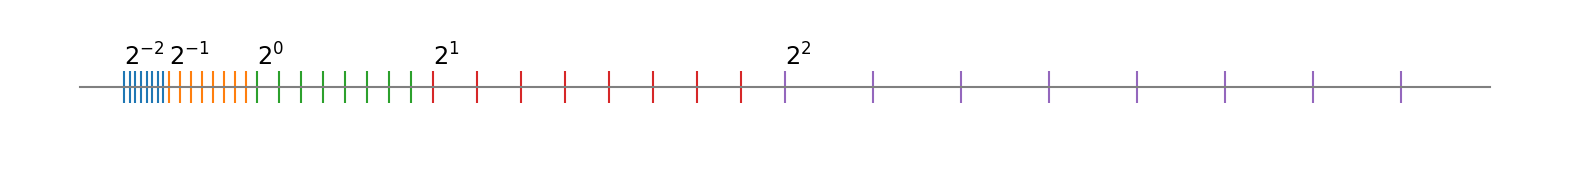

In [ ]:
img_fps()

- machine epsilon, $\epsilon_{\text{mach}}$, is the gap between $1$ and the next FPN.
- unit roundoff, $\mu_{\text{mach}} = \tfrac{1}{2}\, \epsilon_{\text{mach}}$.
- for all $x$ there exists a floating-point $x'$ such that $|x-x'| \le \mu_{\text{mach}}\times |x|$.
- when $M$ normalized, zero represented by $\epsilon = \epsilon_{\text{min}} - 1$.
- $\pm\infty$ returned when and operation overflows.
- $\tfrac{x}{\pm\infty}$ returns $0$ and $\tfrac{x}{0}$ returns $\pm\infty$.
- "not a number" (NaN) is returned if no well-defined finite or infinite result.
- [und so weiter](https://dict.leo.org/german-english/und%20so%20weiter).

## resources

- horners method [@wiki](https://en.wikipedia.org/wiki/Horner%27s_method)
- telescoping sum [@wiki](https://en.wikipedia.org/wiki/Telescoping_series)
- floating-point [@wiki](https://en.wikipedia.org/wiki/Floating-point_arithmetic) [@youtube #1](https://www.youtube.com/watch?v=dQhj5RGtag0) [#2-pt1](https://www.youtube.com/watch?v=gc1Nl3mmCuY) [#2-pt2](https://www.youtube.com/watch?v=b2FgF2sUoS8)
- unit in last place (ulp) [@wiki](https://en.wikipedia.org/wiki/Unit_in_the_last_place)
- machine epsilon [@wiki](https://en.wikipedia.org/wiki/Machine_epsilon)
- [IEEE](https://www.ieee.org/) [754](https://en.wikipedia.org/wiki/IEEE_754)-[2019](https://standards.ieee.org/ieee/754/6210/)

## references

1. johnson, sg. <i>[18.335, introduction to numerical methods](https://ocw.mit.edu/courses/18-335j-introduction-to-numerical-methods-spring-2019/),</i> mit.ocw, spring 2015.
2. sauer, tim. <i>numerical analysis, 2nd edition</i>, pearson education, 2012, p1.
3. martinez, vincent. <i>math 685</i>, hunter, spring 2023.
4. <i>ibid</i>.
5. nerdfirst. <i>[denormal numbers](https://www.youtube.com/watch?v=b2FgF2sUoS8)</i>, [0612 tv](https://www.youtube.com/@NERDfirst), 2020.